In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math

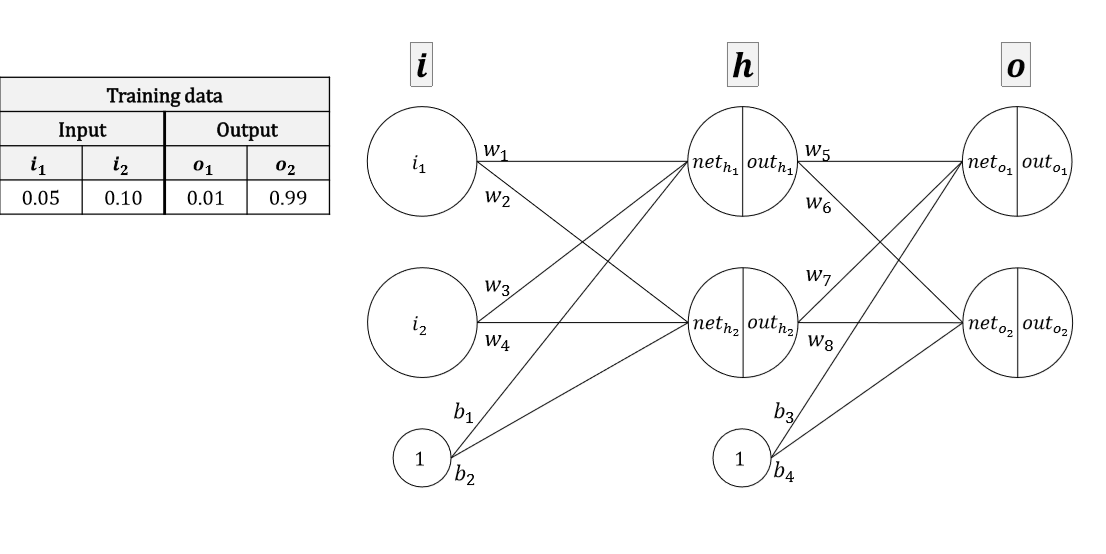

In [2]:
#Input Data
i1 , i2 = 0.05, 0.10
#Output Data
o1 , o2 = 0.01, 0.99

In [3]:
#Weights
w1, w2, w3, w4, w5, w6, w7, w8 = 0.15, 0.20, 0.25,0.30, 0.40, 0.45, 0.50, 0.55
b1, b2, b3, b4 = 0.35, 0.35, 0.60, 0.60

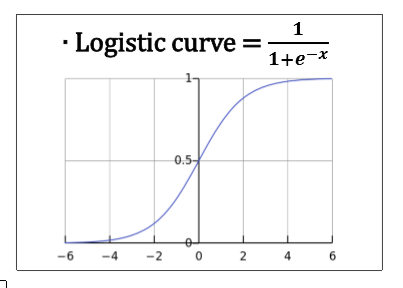

In [4]:
def sigmoid(a):
    s = 1 / (1 + math.e**-a)
    return s

In [5]:
def hidden1(i1,i2,w1,w2,b1):
    return i1*w1 + i2*w2 + b1

In [7]:
outH1 = sigmoid(hidden1(i1,i2,w1,w3,b1))

In [9]:
outH2 = sigmoid(hidden1(i1,i2,w2,w4,b2))

In [11]:
outO1 = sigmoid(hidden1(outH1,outH2,w5,w7,b3))

In [13]:
outO2 = sigmoid(hidden1(outH1,outH2,w6,w8,b4))

In [14]:
print("Target o1 : ",o1," , ", " Output op1 : ",outO1)
print("Target o2 : ",o2," , ", " Output op2 : ",outO2)

Target o1 :  0.01  ,   Output op1 :  0.7569319154399385
Target o2 :  0.99  ,   Output op2 :  0.7677178798069613


In [15]:
#Total Error
Eo1 = 0.5 * (o1 - outO1)**2
Eo2 = 0.5 * (o2 - outO2)**2
Etotal = Eo1 + Eo2
Etotal

0.303658313630144

In [17]:
#Updata weights samples
#Use Chain Rule
#隠れ層の後ろの部分

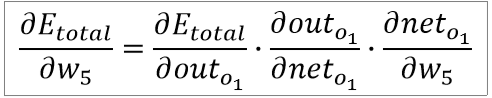

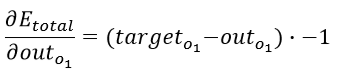

In [21]:
#w5
Etotal_op1 = (o1 - outO1) * -1
Etotal_op1

0.7469319154399385

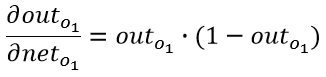

In [22]:
op1_net1 = outO1 * (1 - outO1)
op1_net1

0.18398599082836428

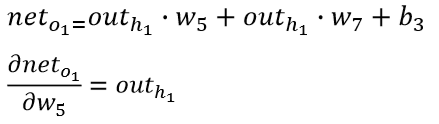

In [23]:
net1_w5 = outH1
net1_w5

0.5944759307482401

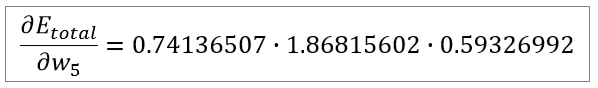

In [24]:
Etotal_w5 = Etotal_op1 * op1_net1 * net1_w5
Etotal_w5

0.08169585986200882

In [25]:
#Learning ratio
a = 0.5

w5 = w5 - Etotal_w5 * a
w5

0.35915207006899563

In [ ]:
def backpropagation():
    
    def sigmoid(a):
        s = 1 / (1 + math.e**-a)
        return s

    def hidden1(i1,i2,w1,w2,b1):
        return i1*w1 + i2*w2 + b1
    
    def totalError():
        Eo1 = 0.5 * (o1 - outO1)**2
        Eo2 = 0.5 * (o2 - outO2)**2
        Etotal = Eo1 + Eo2

In [21]:
#Summary
#隠れ層の後ろ

In [22]:
def updateWeights(i,op,hidden,w):

    def Etotal_op(i, op):
        Etotal_op1 = (i - op) * -1
        return Etotal_op1

    def op_net(op):
        op1_net1 = op * (1 - op)
        return op1_net1

    def net_w(hidden):
        net_w = hidden
        return net_w
    
    def learingRatio(w,new_w):
        a = 0.5
        w = w - new_w * a
        return w

    updateWeight = Etotal_op(i, op) * op_net(op) * net_w(hidden)
    new_w = learingRatio(w,updateWeight)
    print('Update Value is', new_w)
    

In [23]:
updateWeights(i1,op1,hidden1op1,w5)
updateWeights(i1,op2,hidden1op1,w6)
updateWeights(i2,op1,hidden1op2,w7)
updateWeights(i2,op2,hidden1op2,w8)

Update Value is 0.3226791498636844
Update Value is 0.411956936506988
Update Value is 0.4639647673233623
Update Value is 0.5144996483041412


In [24]:
def Etotal_op(i, op):
    Etotal_op1 = (i - op) * -1
    return Etotal_op1

In [25]:
def op_net(op):
    op1_net1 = op * (1 - op)
    return op1_net1

In [26]:
def net_w(hidden):
    net_w = hidden
    return net_w

In [27]:
def learingRatio(w,new_w):
    a = 0.5
    w = w - new_w * a
    return w

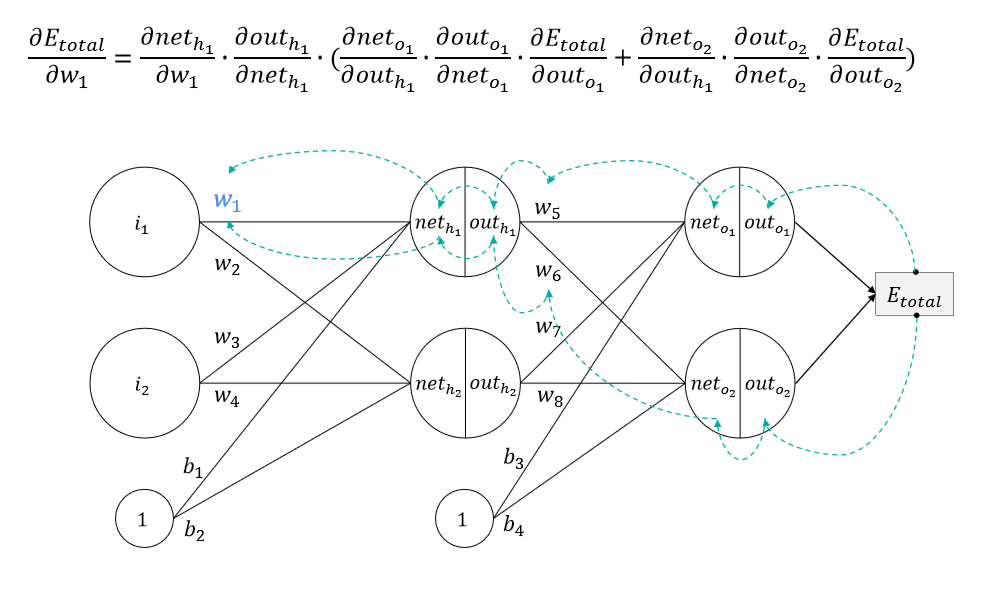

In [28]:
#隠れ層の前の部分

In [29]:
new_weight = net_w(i1) * op_net(hidden1op1) * (w5 *  op_net(op1) * Etotal_op(i1,op1) + w6 * op_net(op2) * Etotal_op(i1,op2))
learingRatio(w1,new_weight)

0.14936963472995787

In [30]:
#sammary
#隠れ層の前と後ろのweights updateS

In [31]:
def updateWeightsV2(i,op,hiddenOp,target_w,*args):

    def Etotal_op(i, op):
        Etotal_op1 = (i - op) * -1
        return Etotal_op1

    def op_net(op):
        op1_net1 = op * (1 - op)
        return op1_net1

    def net_w(hiddenOp):
        net_w = hiddenOp
        return net_w
    
    def learingRatio(w,new_w):
        a = 0.5
        w = w - new_w * a
        return w
    
    bool = args[0]
    if(bool):
        updateWeight = Etotal_op(i, op) * op_net(op) * net_w(hiddenOp)
        print("true")
    else:
        print("false")
        op2, sub_w1, sub_w2 = args[1],args[2],args[3]
        updateWeight = net_w(i) * op_net(hiddenOp) * (sub_w1 *  op_net(op) * Etotal_op(i,op) + sub_w2 * op_net(op2) * Etotal_op(i,op2))

    new_w = learingRatio(target_w,updateWeight)
    print('Update Value is', new_w)
    return new_w

In [32]:
#隠れ層から後ろのweightsのアップデートの場合 : True
new_w5 = updateWeightsV2(i1,op1,hidden1op1,w5,True)
new_w6 = updateWeightsV2(i1,op2,hidden1op1,w6,True)
new_w7 = updateWeightsV2(i2,op1,hidden1op2,w7,True)
new_w8 = updateWeightsV2(i2,op2,hidden1op2,w8,True)

true
Update Value is 0.3226791498636844
true
Update Value is 0.411956936506988
true
Update Value is 0.4639647673233623
true
Update Value is 0.5144996483041412


In [33]:
#隠れ層から前のweightsのアップデートの場合 : Trueとchinルールにより後ろのweight2個が必要
new_w1 = updateWeightsV2(i1,op1,hidden1op1,w1,False,op2,w5,w6)
new_w2 = updateWeightsV2(i1,op1,hidden1op2,w2,False,op2,w7,w8)
new_w3 = updateWeightsV2(i2,op1,hidden1op1,w3,False,op2,w5,w6)
new_w4 = updateWeightsV2(i2,op1,hidden1op2,w4,False,op2,w7,w8)

false
Update Value is 0.14936963472995787
false
Update Value is 0.1991849706762808
false
Update Value is 0.24882770071456656
false
Update Value is 0.2984843318178421
